In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [4]:
norm = 'robnorm'
SAVE_NAME = norm + '_1e-3'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

## Train valid split

In [5]:
# train_label = pd.read_csv('./csv/trainMatrix.csv')
# train_label = train_label.set_index('id')
# train_label

In [6]:
# val_label = pd.read_csv('./csv/validMatrix.csv')
# val_label = val_label.set_index('id')
# val_label

In [7]:
# test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
# test_label = test_label.set_index('filename')
# test_label

In [8]:
# train_data = pd.read_csv('./csv/computed_' + norm + '_2018.csv')
# train_data = train_data.set_index('Movie')
# train_data

In [9]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [10]:
# test_data = pd.read_csv('./csv/computed_' + norm + '_2019.csv')
# test_data = test_data.set_index('Movie')
# test_data

In [11]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [12]:
# val_data = train_data.loc[val_label.index, :]
# train_data = train_data.drop(val_label.index)
# print(train_data.shape, val_data.shape, test_data.shape)
# print(train_label.shape, val_label.shape, test_label.shape)

In [13]:
# train_x = train_data.iloc[:, 8:].to_numpy()
# val_x = val_data.iloc[:, 8:].to_numpy()
# test_x = test_data.iloc[:, 8:].to_numpy()

# train_y = train_label.to_numpy()
# val_y = val_label.to_numpy()
# test_y = test_label.to_numpy()

# print(train_x.shape, train_y.shape)
# print(val_x.shape, val_y.shape)
# print(test_x.shape, test_y.shape)

## Random split valid

In [14]:
train_data = pd.read_csv('./csv/computed_robnorm_2018.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_robnorm,A_std_robnorm,B_avg_robnorm,B_std_robnorm,C_avg_robnorm,C_std_robnorm,D_avg_robnorm,D_std_robnorm
Movie,,,,,,,,,,,,,,,,
tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.789992,0.874789,0.124530,-0.096821,0.593731,0.821813,1.730698,2.017036
tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,2.374429,3.126341,-0.188280,-0.184490,-1.112227,-1.151090,0.455951,-0.608302
tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,-0.457652,-0.681757,-0.082060,-0.111192,0.103080,0.693684,-0.162006,-0.530359
tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,-0.171908,-0.342147,0.052973,0.120398,0.445968,0.756024,0.050287,0.701386
tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,-0.560477,-0.357500,0.333056,0.228767,0.305438,0.563173,0.068344,-0.212864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,2.725664,0.974045,-0.189368,-0.196249,-0.995254,-1.157411,0.566704,1.120819
tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,1.064304,0.237436,-0.153190,-0.188063,-1.408329,-2.226156,-0.899727,-1.217910
tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,-0.435665,-0.548867,0.131403,0.036099,-0.078597,0.241295,0.134378,0.304177


In [15]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [16]:
train_label = pd.read_csv('./csv/filename2genreMat_2018.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt0328810,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
tt10005184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt10017502,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
tt10043732,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt10048096,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
tt9879080,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9891764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
test_data = pd.read_csv('./csv/computed_robnorm_2019.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_robnorm,A_std_robnorm,B_avg_robnorm,B_std_robnorm,C_avg_robnorm,C_std_robnorm,D_avg_robnorm,D_std_robnorm
Movie,,,,,,,,,,,,,,,,
47metersdown,34.804878,23.842184,1.193778e+07,3.062201e+07,0.245609,0.249743,3832.149222,3285.912168,-0.163256,-0.480021,0.911054,0.680381,0.047447,-0.349993,0.130579,1.240680
adogsjourneymovie,34.632479,29.109753,2.688809e+06,4.606428e+06,0.335994,0.349169,3225.348525,2086.338316,-0.180665,-0.229981,-0.207987,-0.373099,1.091339,1.541336,-0.249141,-0.423865
aftermathmovie,35.692308,26.611911,7.378430e+05,1.447868e+06,0.204298,0.259951,3212.997036,2613.398542,-0.073642,-0.348548,-0.444036,-0.501002,-0.429664,-0.155797,-0.256870,0.307491
aftermovie,58.276596,54.904056,5.730162e+06,1.429929e+07,0.212974,0.231655,3180.640515,2106.905407,2.206959,0.994421,0.159989,0.019405,-0.329459,-0.694064,-0.277118,-0.395326
alitamovie,35.784314,29.192272,2.531455e+06,6.295080e+06,0.267326,0.269637,2845.366841,2350.313592,-0.064351,-0.226064,-0.227025,-0.304719,0.298272,0.028445,-0.486924,-0.057569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,43.010204,52.851833,2.255390e+06,6.467894e+06,0.175808,0.220674,3444.948763,3236.149083,0.665332,0.897006,-0.260426,-0.297721,-0.758705,-0.902950,-0.111721,1.171628
whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,-0.437717,-0.680140,1.890940,1.576863,0.000000,-0.136419,1.491222,0.264281
wonderparkmovie,27.282443,13.193380,1.579958e+08,4.421705e+08,0.431886,0.331712,5554.107410,2757.092203,-0.922885,-0.985498,18.582740,17.345700,2.198814,1.209258,1.208136,0.506882


In [18]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [19]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
print(train_data.shape,test_data.shape)
print(train_label.shape,test_label.shape)
# print(train_data.isnull().sum())
# print(test_data.isnull().sum())

(1405, 16) (97, 16)
(1405, 20) (97, 20)


In [21]:
val_data = train_data.sample(frac = 0.2,random_state = 42)
train_data = train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(1124, 16) (281, 16)


In [22]:
val_label = train_label.loc[val_data.index, :]
train_label = train_label.drop(val_data.index)
print(train_label.shape, val_label.shape)

(1124, 20) (281, 20)


In [23]:
train_x = train_data.iloc[:, 8:].to_numpy()
val_x = val_data.iloc[:, 8:].to_numpy()
test_x = test_data.iloc[:, 8:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(1124, 8) (1124, 20)
(281, 8) (281, 20)
(97, 8) (97, 20)


# Model start

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (8, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

Using TensorFlow backend.
/home/tonylab/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tonylab/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tonylab/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tonylab/miniconda3/e

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                660       
Total params: 12,148
Trainable params: 12,148
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1124 samples, validate on 281 samples
Epoch 1/100
1124/1124 [==============================] - 0s 284us/step - loss: 0.6249 - acc: 0.7568 - val_loss: 0.5254 - val_acc: 0.8635
Epoch 2/100
1124/1124 [==============================] - 0s 68us/step - loss: 0.4475 - acc: 0.8756 - val_loss: 0.3809 - val_acc: 0.8915
Epoch 3/100
1124/1124 [==============================] - 0s 67us/step - loss: 0.3571 - acc: 0.8907 - val_loss: 0.3428 - val_acc: 0.8872
Epoch 4/100
1124/1124 [==============================] - 0s 66us/step - loss: 0.3318 - acc: 0.8916 - val_loss: 0.3285 - val_acc: 0.8883
Epoch 5/100
1124/1124 [==============================] - 0s 68us/step - loss: 0.3227 - acc: 0.8918 - val_loss: 0.3248 - val_acc: 0.8884
Epoch 6/100
1124/1124 [==============================] - 0s 99us/step - loss: 0.3185 - acc: 0.8924 - val_loss: 0.3201 - val_acc: 0.8890
Epoch 7/100
1124/1124 [==============================] - 0s 101us/step - loss: 0.3173 - 

In [27]:
# save model weights
model.save(WEIGHTS_SAVE)

In [28]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

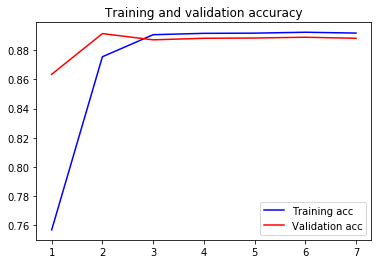

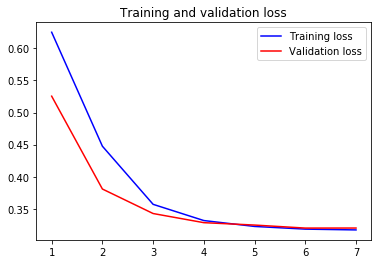

In [29]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [30]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 194us/step


In [31]:
pred.shape

(97, 20)

In [32]:
results=pd.DataFrame(pred, columns=columns)
results["username"] = test_data.index
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [33]:
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.182153,0.135866,0.070466,0.081714,0.181959,0.107534,0.046248,0.518670,0.079473,...,0.076868,0.087955,0.066809,0.057425,0.099054,0.063110,0.052342,0.104636,0.060263,0.083291
1,adogsjourneymovie,0.131701,0.037201,0.010393,0.045855,0.091720,0.074032,0.016837,0.505940,0.031147,...,0.032317,0.038590,0.035362,0.039918,0.051010,0.033777,0.036802,0.072330,0.054683,0.030082
2,aftermathmovie,0.144871,0.098689,0.036164,0.090779,0.149515,0.098467,0.046531,0.536541,0.061864,...,0.108084,0.112544,0.075876,0.077219,0.106772,0.073673,0.043795,0.113768,0.076622,0.086188
3,aftermovie,0.171650,0.162922,0.079130,0.158060,0.223979,0.140052,0.112616,0.479366,0.119119,...,0.177389,0.211155,0.125121,0.148934,0.179091,0.136378,0.091860,0.152309,0.146055,0.170921
4,alitamovie,0.169336,0.087220,0.032412,0.096451,0.148270,0.114102,0.042629,0.503008,0.072423,...,0.108140,0.111501,0.082421,0.078619,0.097245,0.081516,0.062064,0.129555,0.100540,0.081074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.104912,0.075574,0.022789,0.055473,0.115198,0.065609,0.030620,0.574969,0.035098,...,0.085853,0.105112,0.060394,0.047996,0.080970,0.046671,0.018047,0.065413,0.048300,0.090416
93,whatmenwant,0.117461,0.124655,0.069495,0.068044,0.251309,0.065937,0.040257,0.443974,0.109683,...,0.020922,0.033156,0.026510,0.044950,0.076340,0.023009,0.125894,0.048691,0.025988,0.028899
94,wonderparkmovie,0.156684,0.105305,0.279700,0.018489,0.316950,0.033786,0.074255,0.263417,0.187625,...,0.002471,0.007997,0.005301,0.003767,0.029028,0.025458,0.162717,0.019632,0.001741,0.002219
95,xmenmovies,0.192292,0.103048,0.040187,0.108094,0.168247,0.135095,0.053871,0.497562,0.080476,...,0.107571,0.119545,0.096822,0.095986,0.111454,0.092702,0.077677,0.137961,0.131421,0.105159


## Label top n dynamic

In [34]:
true_df = test_label
true_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results = results.set_index('username')
results

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
username,,,,,,,,,,,,,,,,,,,,
47metersdown,0.182153,0.135866,0.070466,0.081714,0.181959,0.107534,0.046248,0.518670,0.079473,0.055144,0.076868,0.087955,0.066809,0.057425,0.099054,0.063110,0.052342,0.104636,0.060263,0.083291
adogsjourneymovie,0.131701,0.037201,0.010393,0.045855,0.091720,0.074032,0.016837,0.505940,0.031147,0.046556,0.032317,0.038590,0.035362,0.039918,0.051010,0.033777,0.036802,0.072330,0.054683,0.030082
aftermathmovie,0.144871,0.098689,0.036164,0.090779,0.149515,0.098467,0.046531,0.536540,0.061864,0.074499,0.108084,0.112544,0.075876,0.077219,0.106772,0.073673,0.043795,0.113768,0.076622,0.086188
aftermovie,0.171650,0.162922,0.079130,0.158060,0.223979,0.140052,0.112616,0.479366,0.119119,0.143310,0.177389,0.211155,0.125121,0.148934,0.179091,0.136379,0.091860,0.152309,0.146055,0.170921
alitamovie,0.169336,0.087220,0.032412,0.096451,0.148270,0.114102,0.042629,0.503008,0.072423,0.102794,0.108140,0.111501,0.082421,0.078619,0.097245,0.081516,0.062064,0.129555,0.100540,0.081074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,0.104912,0.075574,0.022789,0.055473,0.115198,0.065609,0.030620,0.574968,0.035098,0.039454,0.085853,0.105112,0.060394,0.047996,0.080970,0.046671,0.018047,0.065413,0.048300,0.090416
whatmenwant,0.117461,0.124655,0.069495,0.068044,0.251309,0.065937,0.040257,0.443974,0.109683,0.047934,0.020922,0.033156,0.026510,0.044950,0.076340,0.023009,0.125894,0.048691,0.025988,0.028899
wonderparkmovie,0.156684,0.105305,0.279700,0.018489,0.316950,0.033786,0.074255,0.263417,0.187625,0.011178,0.002471,0.007997,0.005301,0.003767,0.029028,0.025458,0.162717,0.019632,0.001741,0.002219


In [36]:
labels = read_json('../genresDic.json')

In [37]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [38]:
li = []
for i, row in true_df.iterrows():
    username = i.split('.')[0]
#     if username == results.loc[i,:]['username']: # username equals
    print(i, username)
    truth = labels[username]
    numTrue = sum(row)
    print('count:', numTrue)

    s = results.loc[username,:]
    top_n = s.sort_values(ascending=False)[:numTrue]
    inList = list(top_n.index)

    onehot = []
    for g in columns:
        onehot.append(int(g in inList))

    acc = countAcc(inList, truth)
    print(acc, inList, truth)

    appList = [username, acc, truth, inList] + onehot
    li.append(appList)
        

47metersdown.mp4 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Action', 'Comedy'] ['Adventure', 'Drama', 'Horror']
adogsjourneymovie.mp4 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Action', 'Comedy'] ['Adventure', 'Comedy', 'Drama']
aftermathmovie.mp4 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Drama', 'Romance', 'War']
aftermovie.mp4 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
alitamovie.mp4 alitamovie
count: 3
0.3333333333333333 ['Drama', 'Action', 'Comedy'] ['Action', 'Adventure', 'Sci-Fi']
angelhasfallen.mp4 angelhasfallen
count: 2
0.5 ['Drama', 'Action'] ['Action', 'Thriller']
angrybirdsmovie.mp4 angrybirdsmovie
count: 3
0.6666666666666666 ['Animation', 'Family', 'Comedy'] ['Adventure', 'Animation', 'Comedy']
annabellemovie.mp4 annabellemovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Horror'] ['Horror', 'Mystery', 'Thriller']
annamovie.mp4 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']

In [39]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.333333,"[Horror, Mystery, Thriller]","[Drama, Comedy, Horror]",0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Sport]",0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
94,wonderparkmovie,0.666667,"[Adventure, Animation, Comedy]","[Comedy, Animation, Drama]",0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [41]:
acc_df['acc'].mean()

0.43127147766323026